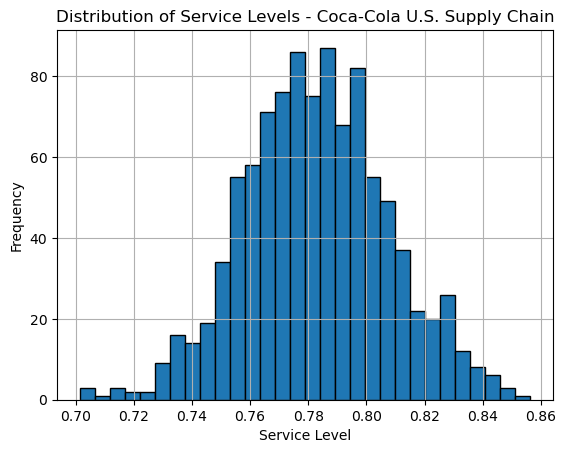

Avg Service Level: 0.78
95% CI: (0.73, 0.83)
Avg Stockout Days: 51.18


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_demand = 10000  # Adjusted based on U.S. consumption data
std_demand = 2000
reorder_point = 30000
order_qty = 50000
initial_inventory = 50000
lead_time_dist = lambda: np.random.triangular(2, 4, 7)
disruption_prob = 0.1  # 10% chance per week
days = 180
iterations = 1000

results = []

for sim in range(iterations):
    inventory = initial_inventory
    on_order = 0
    orders = []
    stockouts = 0
    total_demand = 0
    fulfilled_demand = 0

    for day in range(days):
        demand = max(0, int(np.random.normal(mean_demand, std_demand)))
        total_demand += demand

        # Fulfill demand
        if inventory >= demand:
            inventory -= demand
            fulfilled_demand += demand
        else:
            fulfilled_demand += inventory
            inventory = 0
            stockouts += 1

        # Check for incoming orders
        arrivals_today = [order for order in orders if order["arrival_day"] == day]
        for order in arrivals_today:
            inventory += order["qty"]
        orders = [order for order in orders if order["arrival_day"] > day]

        # Weekly disruption check (on Mondays)
        if day % 7 == 0:
            disrupted = np.random.rand() < disruption_prob
        else:
            disrupted = False

        # Reorder logic
        if inventory <= reorder_point and on_order == 0:
            if not disrupted:
                arrival = day + int(lead_time_dist())
                orders.append({"qty": order_qty, "arrival_day": arrival})
                on_order = 1

        # Reset order flag
        if on_order and inventory > reorder_point:
            on_order = 0

    service_level = fulfilled_demand / total_demand
    results.append((stockouts, service_level))

# Extract and analyze results
stockouts_array, service_levels = zip(*results)

# Visualization
plt.hist(service_levels, bins=30, edgecolor='black')
plt.title("Distribution of Service Levels - Coca-Cola U.S. Supply Chain")
plt.xlabel("Service Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Summary stats
print(f"Avg Service Level: {np.mean(service_levels):.2f}")
print(f"95% CI: ({np.percentile(service_levels, 2.5):.2f}, {np.percentile(service_levels, 97.5):.2f})")
print(f"Avg Stockout Days: {np.mean(stockouts_array):.2f}")


             Plant     Region  Average Service Level  Average Stockout Days  \
0    Charlotte, NC  Southeast               0.802211                 47.100   
1   Birmingham, AL      South               0.840623                 38.786   
2  Los Angeles, CA       West               0.743210                 59.416   
3      Chicago, IL    Midwest               0.773434                 53.410   
4      Bedford, NH  Northeast               0.879286                 30.286   

   Average Total Cost  
0        429991.81368  
1        345844.51632  
2        594793.29884  
3        505366.80160  
4        275152.08544  


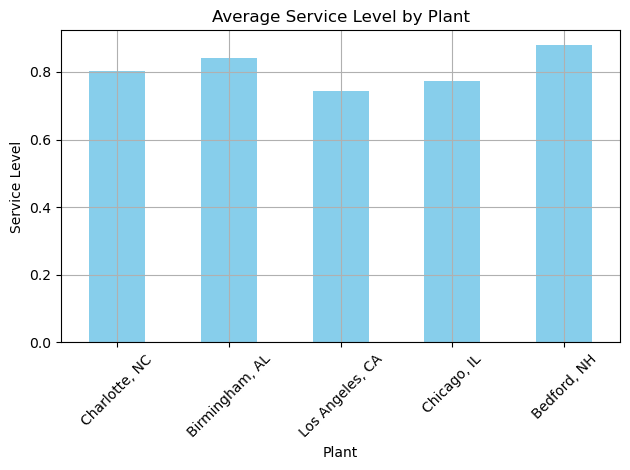

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define manufacturing plants
plants = [
    {"name": "Charlotte, NC", "region": "Southeast", "base_demand": 9500},
    {"name": "Birmingham, AL", "region": "South", "base_demand": 8700},
    {"name": "Los Angeles, CA", "region": "West", "base_demand": 11000},
    {"name": "Chicago, IL", "region": "Midwest", "base_demand": 10200},
    {"name": "Bedford, NH", "region": "Northeast", "base_demand": 8000}
]

# Simulation parameters
days = 180
iterations = 500
lead_time_dist = lambda: np.random.triangular(2, 4, 7)

# Risk probabilities
transport_delay_prob = 0.1
labor_shortage_prob = 0.05
raw_material_delay_prob = 0.07

# Output storage
plant_results = []

# Simulate for each plant
for plant in plants:
    results = []
    for sim in range(iterations):
        inventory = 50000
        on_order = 0
        orders = []
        stockouts = 0
        fulfilled_demand = 0
        total_demand = 0
        total_cost = 0
        holding_cost_per_unit = 0.02
        stockout_cost_per_unit = 1.00
        order_cost = 100
        reorder_point = 30000
        order_qty = 50000

        for day in range(days):
            demand = max(0, int(np.random.normal(plant["base_demand"], 2000)))
            total_demand += demand

            # Fulfill demand
            if inventory >= demand:
                inventory -= demand
                fulfilled_demand += demand
            else:
                fulfilled_demand += inventory
                total_cost += (demand - inventory) * stockout_cost_per_unit
                inventory = 0
                stockouts += 1

            # Incoming shipments
            arrivals_today = [o for o in orders if o["arrival_day"] == day]
            for order in arrivals_today:
                inventory += order["qty"]
            orders = [o for o in orders if o["arrival_day"] > day]

            # Weekly risk disruptions
            if day % 7 == 0:
                disrupted = (
                    np.random.rand() < transport_delay_prob or
                    np.random.rand() < labor_shortage_prob or
                    np.random.rand() < raw_material_delay_prob
                )
            else:
                disrupted = False

            # Place new order
            if inventory <= reorder_point and on_order == 0:
                if not disrupted:
                    arrival = day + int(lead_time_dist())
                    orders.append({"qty": order_qty, "arrival_day": arrival})
                    total_cost += order_cost
                    on_order = 1

            if on_order and inventory > reorder_point:
                on_order = 0

            total_cost += inventory * holding_cost_per_unit

        service_level = fulfilled_demand / total_demand
        results.append((stockouts, service_level, total_cost))

    stockouts_array, service_levels, total_costs = zip(*results)
    plant_results.append({
        "Plant": plant["name"],
        "Region": plant["region"],
        "Average Service Level": np.mean(service_levels),
        "Average Stockout Days": np.mean(stockouts_array),
        "Average Total Cost": np.mean(total_costs)
    })

# Display results as a DataFrame
plant_results_df = pd.DataFrame(plant_results)
print(plant_results_df)

# Optional: Visualization
plant_results_df.plot(kind='bar', x='Plant', y='Average Service Level', legend=False,
                      title='Average Service Level by Plant', color='skyblue')
plt.ylabel('Service Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


             Plant     Region  Avg Service Level  Avg Stockout Days  \
0    Charlotte, NC  Southeast           0.801524             47.202   
1   Birmingham, AL      South           0.843713             38.332   
2  Los Angeles, CA       West           0.742381             59.302   
3      Chicago, IL    Midwest           0.773434             53.316   
4      Bedford, NH  Northeast           0.879870             30.208   

   Avg Total Cost  
0    431048.17072  
1    341124.16384  
2    596270.93244  
3    504665.79556  
4    274243.28312  


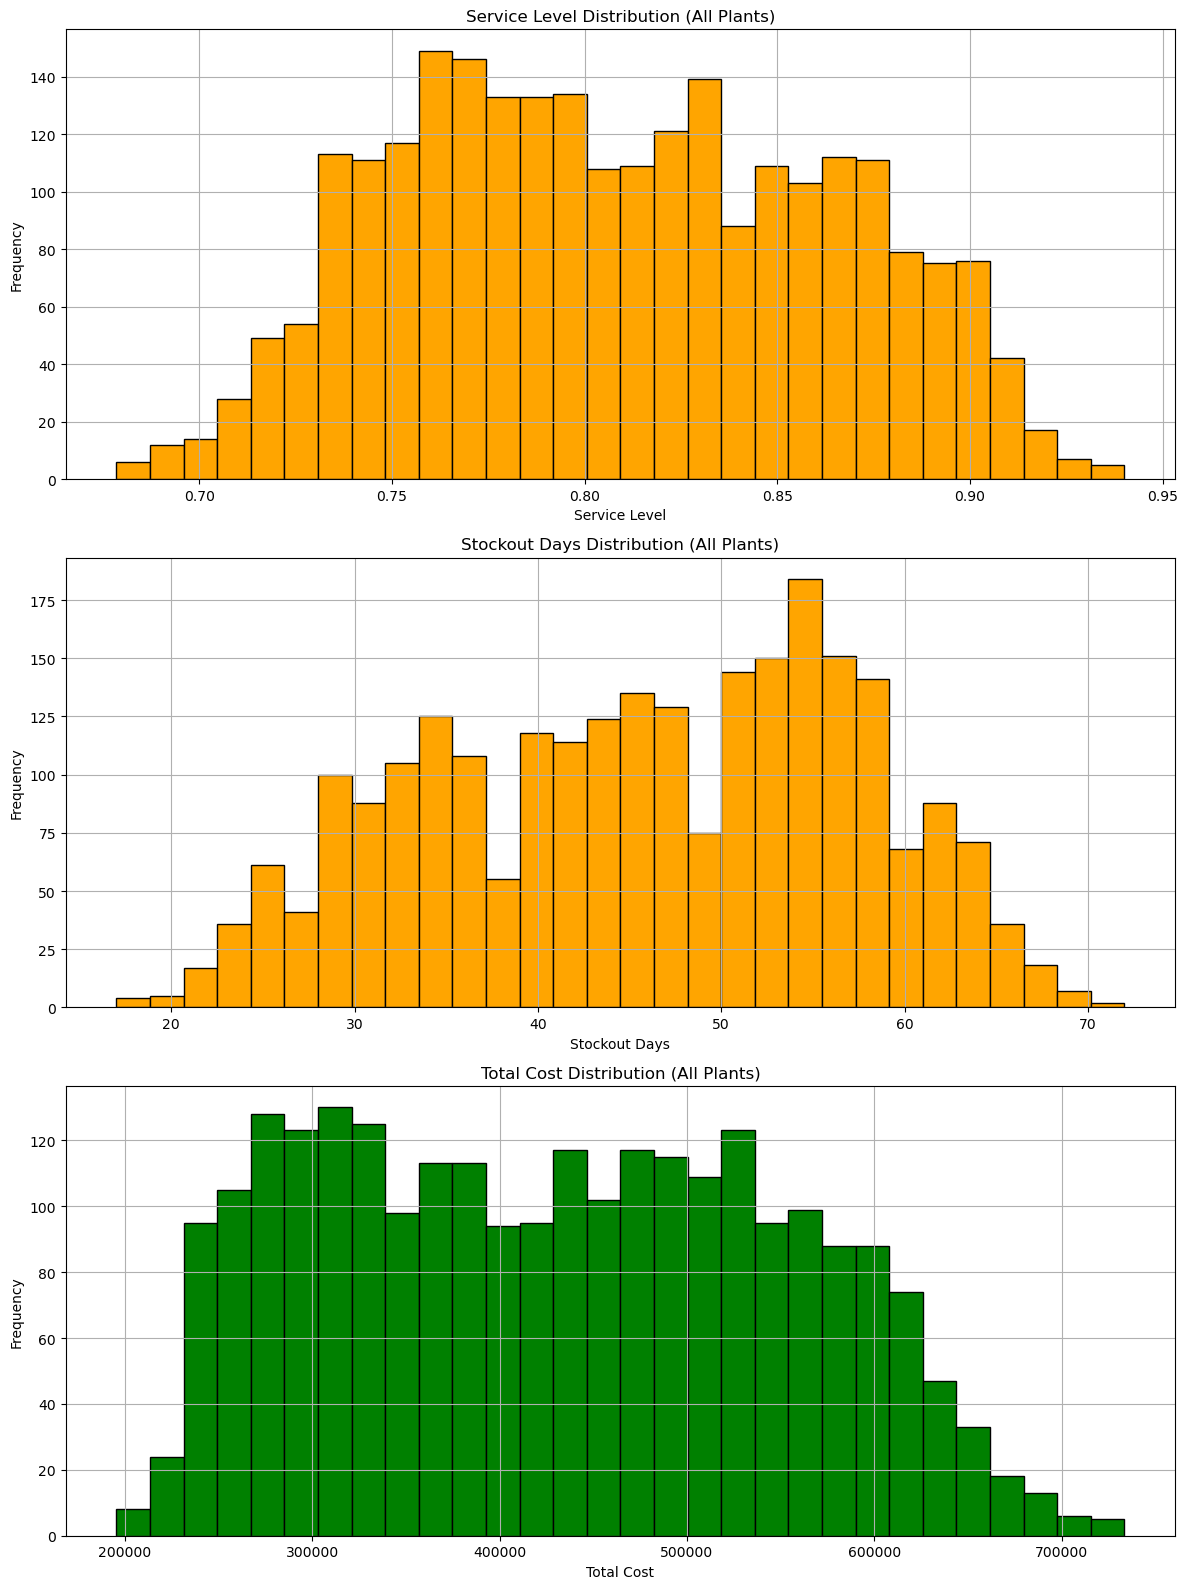

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define manufacturing plants and regional demand
plants = [
    {"name": "Charlotte, NC", "region": "Southeast", "base_demand": 9500},
    {"name": "Birmingham, AL", "region": "South", "base_demand": 8700},
    {"name": "Los Angeles, CA", "region": "West", "base_demand": 11000},
    {"name": "Chicago, IL", "region": "Midwest", "base_demand": 10200},
    {"name": "Bedford, NH", "region": "Northeast", "base_demand": 8000}
]

# Simulation parameters
days = 180
iterations = 500
lead_time_dist = lambda: np.random.triangular(2, 4, 7)

# Risk factors
transport_delay_prob = 0.1
labor_shortage_prob = 0.05
raw_material_delay_prob = 0.07

# Output containers
service_levels_all = []
stockouts_all = []
total_costs_all = []
plant_summary = []

# Run simulation for each plant
for plant in plants:
    service_levels = []
    stockouts = []
    total_costs = []

    for sim in range(iterations):
        inventory = 50000
        on_order = 0
        orders = []
        reorder_point = 30000
        order_qty = 50000
        holding_cost_per_unit = 0.02
        stockout_cost_per_unit = 1.00
        order_cost = 100
        total_cost = 0
        total_demand = 0
        fulfilled_demand = 0
        stockout_days = 0

        for day in range(days):
            demand = max(0, int(np.random.normal(plant["base_demand"], 2000)))
            total_demand += demand

            if inventory >= demand:
                inventory -= demand
                fulfilled_demand += demand
            else:
                fulfilled_demand += inventory
                total_cost += (demand - inventory) * stockout_cost_per_unit
                inventory = 0
                stockout_days += 1

            arrivals_today = [o for o in orders if o["arrival_day"] == day]
            for order in arrivals_today:
                inventory += order["qty"]
            orders = [o for o in orders if o["arrival_day"] > day]

            if day % 7 == 0:
                disrupted = (
                    np.random.rand() < transport_delay_prob or
                    np.random.rand() < labor_shortage_prob or
                    np.random.rand() < raw_material_delay_prob
                )
            else:
                disrupted = False

            if inventory <= reorder_point and on_order == 0:
                if not disrupted:
                    arrival = day + int(lead_time_dist())
                    orders.append({"qty": order_qty, "arrival_day": arrival})
                    total_cost += order_cost
                    on_order = 1

            if on_order and inventory > reorder_point:
                on_order = 0

            total_cost += inventory * holding_cost_per_unit

        service_level = fulfilled_demand / total_demand
        service_levels.append(service_level)
        stockouts.append(stockout_days)
        total_costs.append(total_cost)

    # Collect summary for this plant
    plant_summary.append({
        "Plant": plant["name"],
        "Region": plant["region"],
        "Avg Service Level": np.mean(service_levels),
        "Avg Stockout Days": np.mean(stockouts),
        "Avg Total Cost": np.mean(total_costs)
    })

    # Aggregate for combined visualization
    service_levels_all.extend(service_levels)
    stockouts_all.extend(stockouts)
    total_costs_all.extend(total_costs)

# Convert plant-level summary to DataFrame
summary_df = pd.DataFrame(plant_summary)
print(summary_df)

# Plot combined histograms
fig, axs = plt.subplots(3, 1, figsize=(12, 16))

axs[0].hist(service_levels_all, bins=30, edgecolor='black', color='orange')
axs[0].set_title("Service Level Distribution (All Plants)")
axs[0].set_xlabel("Service Level")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

axs[1].hist(stockouts_all, bins=30, edgecolor='black', color='orange')
axs[1].set_title("Stockout Days Distribution (All Plants)")
axs[1].set_xlabel("Stockout Days")
axs[1].set_ylabel("Frequency")
axs[1].grid(True)

axs[2].hist(total_costs_all, bins=30, edgecolor='black', color='green')
axs[2].set_title("Total Cost Distribution (All Plants)")
axs[2].set_xlabel("Total Cost")
axs[2].set_ylabel("Frequency")
axs[2].grid(True)

plt.tight_layout()
plt.show()


                            Strategy  \
0                          Base Case   
1            Higher Inventory Buffer   
2      Reduced Lead Time Variability   
3  Diversified Sourcing (Lower Risk)   

                                     Description  Avg Service Level  \
0                         Standard configuration           0.778586   
1  Increased initial inventory and reorder point           0.127460   
2                 Tighter lead time distribution           0.828036   
3               Reduced disruption probabilities           0.782057   

   Avg Stockout Days  Avg Total Cost  
0          51.973333    4.879602e+05  
1         158.036667    1.587589e+06  
2          44.746667    4.036500e+05  
3          51.403333    4.818346e+05  


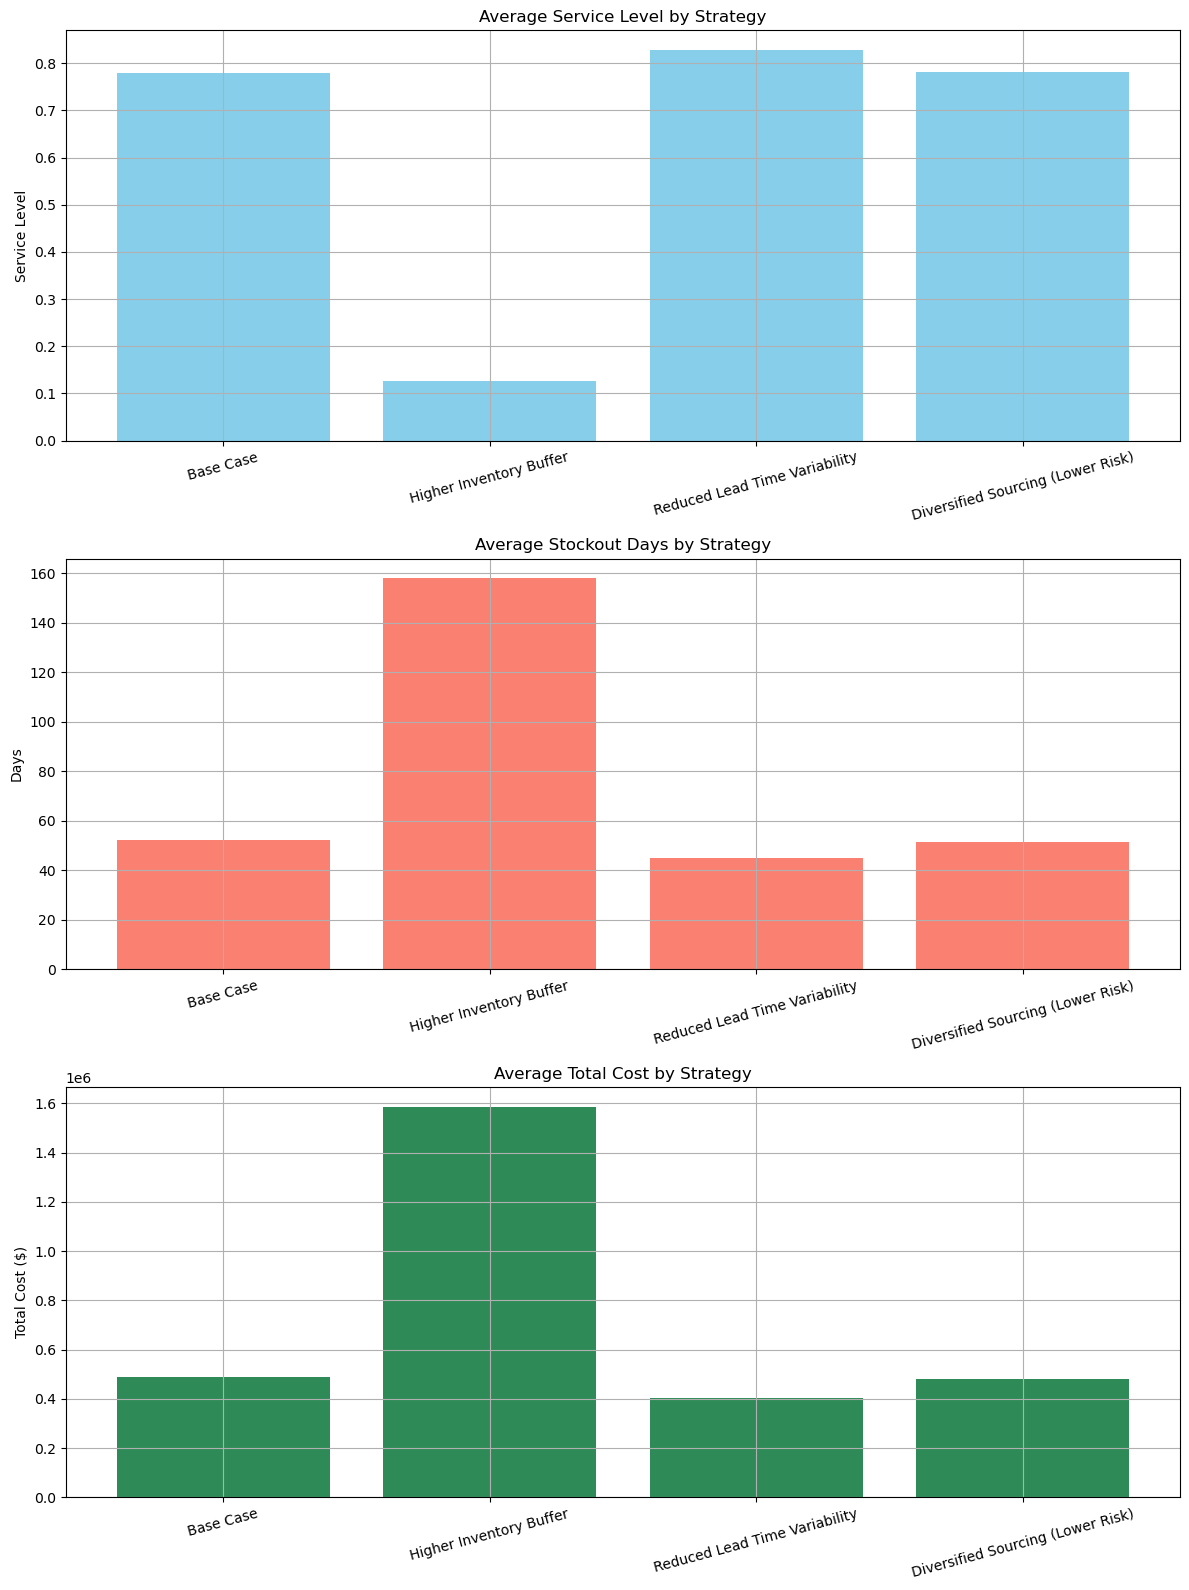

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define mitigation scenarios
scenarios = {
    "Base Case": {
        "initial_inventory": 50000,
        "reorder_point": 30000,
        "lead_time_dist": lambda: np.random.triangular(2, 4, 7),
        "description": "Standard configuration"
    },
    "Higher Inventory Buffer": {
        "initial_inventory": 70000,
        "reorder_point": 50000,
        "lead_time_dist": lambda: np.random.triangular(2, 4, 7),
        "description": "Increased initial inventory and reorder point"
    },
    "Reduced Lead Time Variability": {
        "initial_inventory": 50000,
        "reorder_point": 30000,
        "lead_time_dist": lambda: np.random.triangular(3, 4, 5),
        "description": "Tighter lead time distribution"
    },
    "Diversified Sourcing (Lower Risk)": {
        "initial_inventory": 50000,
        "reorder_point": 30000,
        "lead_time_dist": lambda: np.random.triangular(2, 4, 7),
        "transport_delay_prob": 0.05,
        "labor_shortage_prob": 0.03,
        "raw_material_delay_prob": 0.04,
        "description": "Reduced disruption probabilities"
    }
}

# Simulation constants
days = 180
iterations = 300
order_qty = 50000
holding_cost_per_unit = 0.02
stockout_cost_per_unit = 1.00
order_cost = 100

scenario_results = []

# Run each scenario
for name, config in scenarios.items():
    service_levels = []
    stockout_days_list = []
    total_costs = []

    # Risk parameters (default if not in config)
    transport_delay_prob = config.get("transport_delay_prob", 0.1)
    labor_shortage_prob = config.get("labor_shortage_prob", 0.05)
    raw_material_delay_prob = config.get("raw_material_delay_prob", 0.07)

    for _ in range(iterations):
        inventory = config["initial_inventory"]
        reorder_point = config["reorder_point"]
        lead_time_dist = config["lead_time_dist"]
        on_order = 0
        orders = []
        total_cost = 0
        total_demand = 0
        fulfilled_demand = 0
        stockout_days = 0

        for day in range(days):
            demand = max(0, int(np.random.normal(10000, 2000)))
            total_demand += demand

            if inventory >= demand:
                inventory -= demand
                fulfilled_demand += demand
            else:
                fulfilled_demand += inventory
                total_cost += (demand - inventory) * stockout_cost_per_unit
                inventory = 0
                stockout_days += 1

            arrivals_today = [o for o in orders if o["arrival_day"] == day]
            for order in arrivals_today:
                inventory += order["qty"]
            orders = [o for o in orders if o["arrival_day"] > day]

            if day % 7 == 0:
                disrupted = (
                    np.random.rand() < transport_delay_prob or
                    np.random.rand() < labor_shortage_prob or
                    np.random.rand() < raw_material_delay_prob
                )
            else:
                disrupted = False

            if inventory <= reorder_point and on_order == 0:
                if not disrupted:
                    arrival = day + int(lead_time_dist())
                    orders.append({"qty": order_qty, "arrival_day": arrival})
                    total_cost += order_cost
                    on_order = 1

            if on_order and inventory > reorder_point:
                on_order = 0

            total_cost += inventory * holding_cost_per_unit

        service_level = fulfilled_demand / total_demand
        service_levels.append(service_level)
        stockout_days_list.append(stockout_days)
        total_costs.append(total_cost)

    scenario_results.append({
        "Strategy": name,
        "Description": config["description"],
        "Avg Service Level": np.mean(service_levels),
        "Avg Stockout Days": np.mean(stockout_days_list),
        "Avg Total Cost": np.mean(total_costs)
    })

# Convert to DataFrame
results_df = pd.DataFrame(scenario_results)
print(results_df)

# Visualization: Compare Strategies
fig, axs = plt.subplots(3, 1, figsize=(12, 16))

# Service Level Bar Chart
axs[0].bar(results_df["Strategy"], results_df["Avg Service Level"], color="skyblue")
axs[0].set_title("Average Service Level by Strategy")
axs[0].set_ylabel("Service Level")
axs[0].grid(True)

# Stockout Days Bar Chart
axs[1].bar(results_df["Strategy"], results_df["Avg Stockout Days"], color="salmon")
axs[1].set_title("Average Stockout Days by Strategy")
axs[1].set_ylabel("Days")
axs[1].grid(True)

# Total Cost Bar Chart
axs[2].bar(results_df["Strategy"], results_df["Avg Total Cost"], color="seagreen")
axs[2].set_title("Average Total Cost by Strategy")
axs[2].set_ylabel("Total Cost ($)")
axs[2].grid(True)

# Rotate labels for clarity
for ax in axs:
    ax.tick_params(axis='x', rotation=15)


plt.tight_layout()
plt.show()
